# Importing Libraries

In [1]:
import torch
from torch import nn

import numpy as np

from sklearn import datasets

import matplotlib as mpl
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt

import reprlib
import sys
from termcolor import cprint

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [4]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": .8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Configuring Other Notebook Parameters

In [5]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# Pre-installing Custom Functions

In [6]:
sys.path.append("../")

In [7]:
from Modules import *

# Practicing in Stages

## Creating Dataset

In [8]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts,
                           random_state=123,
                           centers=centers,
                           cluster_std=0.4)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Creation of data clusters around selected central locations")

statements = [
    """
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts,
                           random_state=123,
                           centers=centers,
                           cluster_std=0.4)
"""
]
tabulation.statement_generator(statements)

variables = ["X", "y"]
values = [str(reprlib_rules.repr(X)), str(reprlib_rules.repr(y))]
tabulation.variable_generator(variables, values)

Creation of data clusters around selected central locations

    +----------------------------------------------+
    | Statement                                    |
    +----------------------------------------------+
    | n_pts = 100                                  |
    | centers = [[-0.5, 0.5], [0.5, -0.5]]         |
    | X, y = datasets.make_blobs(n_samples=n_pts,  |
    |                            random_state=123, |
    |                            centers=centers,  |
    |                            cluster_std=0.4)  |
    +----------------------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | X        | array([[-0.13715792, -0.07147228],               |
    |          |        [ 0.80437976, -0.37061246],               |
    |          |        [-0.60224775, -0.61943564],               |
 

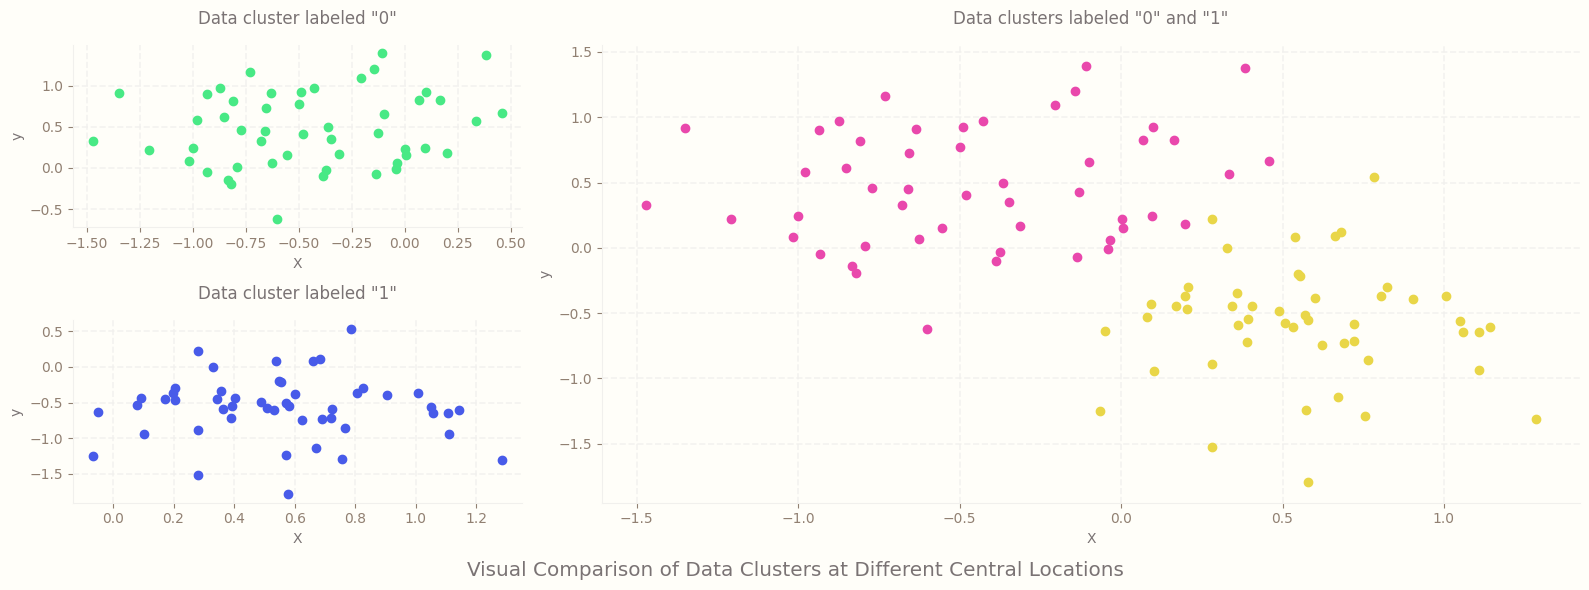

In [9]:
colors = calm_color_generator(4)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 3 * 2)

fig, axs = plt.subplots(nrows=2, ncols=3)
gs = axs[0, 1].get_gridspec()
for ax in axs[0, 1:]:
    ax.remove()
for ax in axs[1, 1:]:
    ax.remove()
axbig = fig.add_subplot(gs[:, 1:])

axs[0, 0].scatter(X[y == 0, 0], X[y == 0, 1], color=colors.pop(0))
axs[0, 0].set_title("Data cluster labeled \"0\"", loc="center", pad=15)

axs[1, 0].scatter(X[y == 1, 0], X[y == 1, 1], color=colors.pop(0))
axs[1, 0].set_title("Data cluster labeled \"1\"", loc="center", pad=15)

for ax in axs.flat:
    ax.set(xlabel="X", ylabel="y")

axbig.scatter(X[y == 0, 0], X[y == 0, 1], color=colors.pop(0))
axbig.scatter(X[y == 1, 0], X[y == 1, 1], color=colors.pop(0))
axbig.set_title("Data clusters labeled \"0\" and \"1\"", loc="center", pad=15)

axbig.set(xlabel="X", ylabel="y")

fig.suptitle(
    "Visual Comparison of Data Clusters at Different Central Locations",
    fontsize="x-large",
    x=0.5,
    y=0)

plt.tight_layout()
plt.show()

## Model Setup

In [10]:
class Model(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred


torch.manual_seed(2)
model = Model(2, 1)

tabulation = Form_Generator()
tabulation.heading_printer("Initialization of custom module class")

definitions = [
    """
class Model(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
"""
]
tabulation.definition_generator(definitions)

statements = ["""
torch.manual_seed(2)
model = Model(2, 1)
"""]
tabulation.statement_generator(statements)

variables = ["model"]
values = [str(model)]
tabulation.variable_generator(variables, values)

expressions = ["model.parameters()", "list(model.parameters())"]
results = [str(model.parameters()), str(list(model.parameters()))]
tabulation.expression_generator(expressions, results)

Initialization of custom module class

    +----------------------------------------------------------+
    | Definition                                               |
    +----------------------------------------------------------+
    | class Model(nn.Module):                                  |
    |                                                          |
    |     def __init__(self, input_size, output_size):         |
    |         super().__init__()                               |
    |         self.linear = nn.Linear(input_size, output_size) |
    |                                                          |
    |     def forward(self, x):                                |
    |         pred = torch.sigmoid(self.linear(x))             |
    |         return pred                                      |
    +----------------------------------------------------------+
    +----------------------+
    | Statement            |
    +----------------------+
    | torch.manual_seed(2) |


In [11]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]

tabulation = Form_Generator()
tabulation.heading_printer("Value extraction by unpacking model parameters")

statements = ["""
[w, b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]
"""]
tabulation.statement_generator(statements)

variables = ["w", "b", "w1", "w2", "b1"]
values = [str(w), str(b), str(w1), str(w2), str(b1)]
tabulation.variable_generator(variables, values)

expressions = ["w1.item()", "w2.item()", "b1.item()"]
results = [str(w1.item()), str(w2.item()), str(b1.item())]
tabulation.expression_generator(expressions, results)

Value extraction by unpacking model parameters

    +-----------------------------+
    | Statement                   |
    +-----------------------------+
    | [w, b] = model.parameters() |
    | w1, w2 = w.view(2)          |
    | b1 = b[0]                   |
    +-----------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | w        | Parameter containing:                            |
    |          | tensor([[ 0.1622, -0.1683]], requires_grad=True) |
    | b        | Parameter containing:                            |
    |          | tensor([0.1939], requires_grad=True)             |
    | w1       | tensor(0.1622, grad_fn=⟨UnbindBackward0⟩)        |
    | w2       | tensor(-0.1683, grad_fn=⟨UnbindBackward0⟩)       |
    | b1       | tensor(0.1939, grad_fn=⟨SelectBackward0⟩)        |
    +----------+----

In [12]:
def get_params():
    return (w1.item(), w2.item(), b[0].item())


def scatter_plot():
    global colors
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color=colors.pop(0))
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color=colors.pop(0))


def plot_fit(title):
    global colors
    plt.title(label=title)
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1 * x1 + b1) / -w2
    plt.plot(x1, x2, c=colors.pop(0))
    scatter_plot()


tabulation = Form_Generator()
tabulation.heading_printer("Definition of visualization function")

definitions = [
    """
def get_params():
    return (w1.item(), w2.item(), b[0].item())


def scatter_plot():
    global colors
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color=colors.pop(0))
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color=colors.pop(0))


def plot_fit(title):
    global colors
    plt.title(label=title)
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1 * x1 + b1) / -w2
    plt.plot(x1, x2, c=colors.pop(0))
    scatter_plot()
"""
]
tabulation.definition_generator(definitions)

Definition of visualization function

    +------------------------------------------------+
    | Definition                                     |
    +------------------------------------------------+
    | def get_params():                              |
    |     return (w1.item(), w2.item(), b[0].item()) |
    |                                                |
    |                                                |
    | def scatter_plot():                            |
    |     global colors                              |
    |     plt.scatter(X[y == 0, 0], X[y == 0, 1],    |
    |     color=colors.pop(0))                       |
    |     plt.scatter(X[y == 1, 0], X[y == 1, 1],    |
    |     color=colors.pop(0))                       |
    |                                                |
    |                                                |
    | def plot_fit(title):                           |
    |     global colors                              |
    |     plt.title(label=t

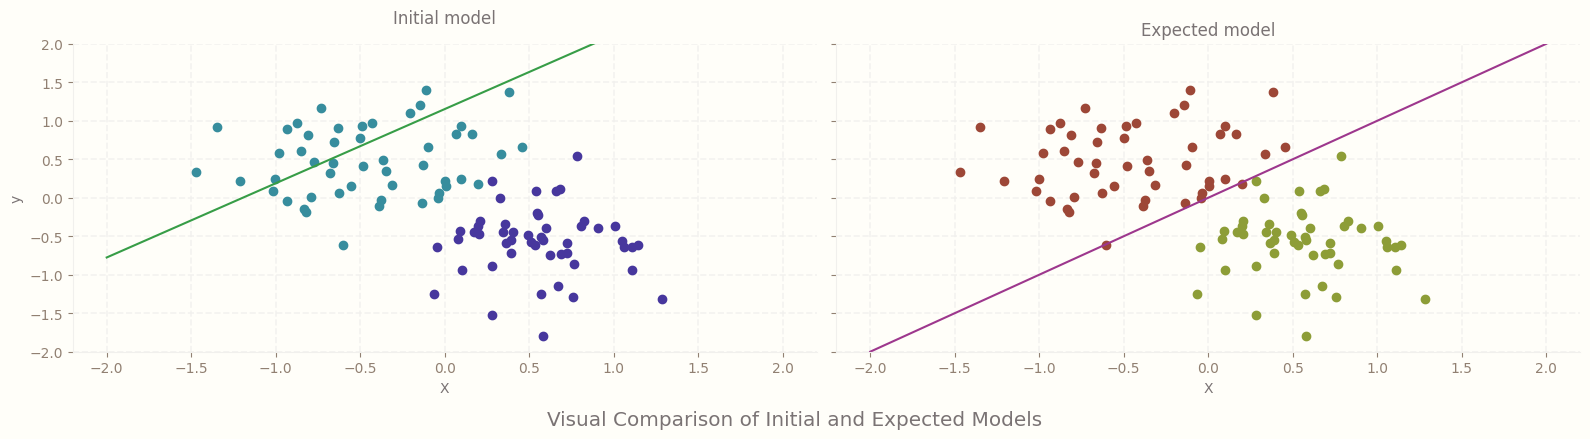

In [13]:
def perpendicular_line(centers):
    x1, y1 = centers[0]
    x2, y2 = centers[1]
    x_mid = (x1 + x2) / 2
    y_mid = (y1 + y2) / 2
    w0 = (y1 - y2) / (x1 - x2)
    try:
        w = -1 / w0
    except ZeroDivisionError as error:
        exception = Exception("The slope of a vertical line is undefined.")
        cprint(f"Unexpected error: {error}.", "red", attrs=["bold", "reverse"])
        cprint(exception, "red", attrs=["bold", "underline"])
        w0 = 0.0001
    w = -1 / w0
    b = y_mid - w * x_mid
    return w, b


colors = calm_color_generator(6)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 2)

fig, axs = plt.subplots(1, 2, sharey=True)

plt.subplot(1, 2, 1)
plot_fit("Initial model")
plt.title(axs[0].get_title(), loc="center", pad=15)

plt.subplot(1, 2, 2)
x1 = np.array([-2.0, 2.0])
w, b = perpendicular_line(centers)
x2 = w * x1 + b
plt.plot(x1, x2, c=colors.pop(0))
scatter_plot()
plt.title(label="Expected model")

for ax in axs.flat:
    ax.set(xlabel="X", ylabel="y")
    ax.set_ylim([-2.0, 2.0])
    ax.label_outer()

fig.suptitle("Visual Comparison of Initial and Expected Models",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

## Model Training

In [14]:
X_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

tabulation = Form_Generator()
tabulation.heading_printer("Dataset conversion in tensor form")

statements = [
    """
X_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))
"""
]
tabulation.statement_generator(statements)

variables = ["X_data", "y_data"]
values = [str(reprlib_rules.repr(X_data)), str(reprlib_rules.repr(y_data))]
tabulation.variable_generator(variables, values)

Dataset conversion in tensor form

    +------------------------------------------+
    | Statement                                |
    +------------------------------------------+
    | X_data = torch.Tensor(X)                 |
    | y_data = torch.Tensor(y.reshape(100, 1)) |
    +------------------------------------------+
    +----------+------------------------------+
    | Variable | Value                        |
    +----------+------------------------------+
    | X_data   | tensor([[-0.1372, -0.0715],  |
    |          |         [ 0.8044, -0.3706],  |
    |          |         [-0.6022, -0.6194],  |
    |          |         [ 0.5709, -0.5120],  |
    |          |         [ 0...,  0.2444],    |
    |          |         [-0.0484, -0.6330],  |
    |          |         [-0.8518,  0.6135],  |
    |          |         [ 0.3581, -0.3434],  |
    |          |         [-1.3492,  0.9159]]) |
    | y_data   | tensor([[0.],                |
    |          |         [1.],                |

In [15]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Specific configuration settings for the training process")

statements = [
    """
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
"""
]
tabulation.statement_generator(statements)

variables = ["criterion", "optimizer"]
values = [str(criterion), str(optimizer)]
tabulation.variable_generator(variables, values)

Specific configuration settings for the training process

    +----------------------------------------------------------+
    | Statement                                                |
    +----------------------------------------------------------+
    | criterion = nn.BCELoss()                                 |
    | optimizer = torch.optim.SGD(model.parameters(), lr=0.01) |
    +----------------------------------------------------------+
    +-----------+---------------------------+
    | Variable  | Value                     |
    +-----------+---------------------------+
    | criterion | BCELoss()                 |
    | optimizer | SGD (                     |
    |           | Parameter Group 0         |
    |           |     dampening: 0          |
    |           |     differentiable: False |
    |           |     foreach: None         |
    |           |     lr: 0.01              |
    |           |     maximize: False       |
    |           |     momentum: 0           |


In [16]:
epochs = 1000
losses = []

dataframe = DataFrame_Generator("epoch", "loss", "w1", "w2", "b")

for i in range(epochs):
    y_pred = model.forward(X_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss.item())
    dataframe.updater(i + 1, loss.item(),
                      list(model.parameters())[0][0][0].item(),
                      list(model.parameters())[0][0][1].item(),
                      list(model.parameters())[1][0].item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

tabulation = Form_Generator()
tabulation.heading_printer("Model training for a specific number of epochs")

statements = """
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model.forward(X_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
"""
statements = [statements]
tabulation.statement_generator(statements)

variables = ["epochs", "losses"]
values = [str(epochs), str(reprlib_rules.repr(losses))]
tabulation.variable_generator(variables, values, expandtabs=1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

Model training for a specific number of epochs

    +--------------------------------------+
    | Statement                            |
    +--------------------------------------+
    | epochs = 1000                        |
    | losses = []                          |
    |                                      |
    | for i in range(epochs):              |
    |     y_pred = model.forward(X_data)   |
    |     loss = criterion(y_pred, y_data) |
    |     losses.append(loss.item())       |
    |     optimizer.zero_grad()            |
    |     loss.backward()                  |
    |     optimizer.step()                 |
    +--------------------------------------+
    +----------+-----------------------------------------------+
    | Variable | Value                                         |
    +----------+-----------------------------------------------+
    | epochs   | 1000                                          |
    | losses   | [0.6185115575790405, 0.6174640655517578,     

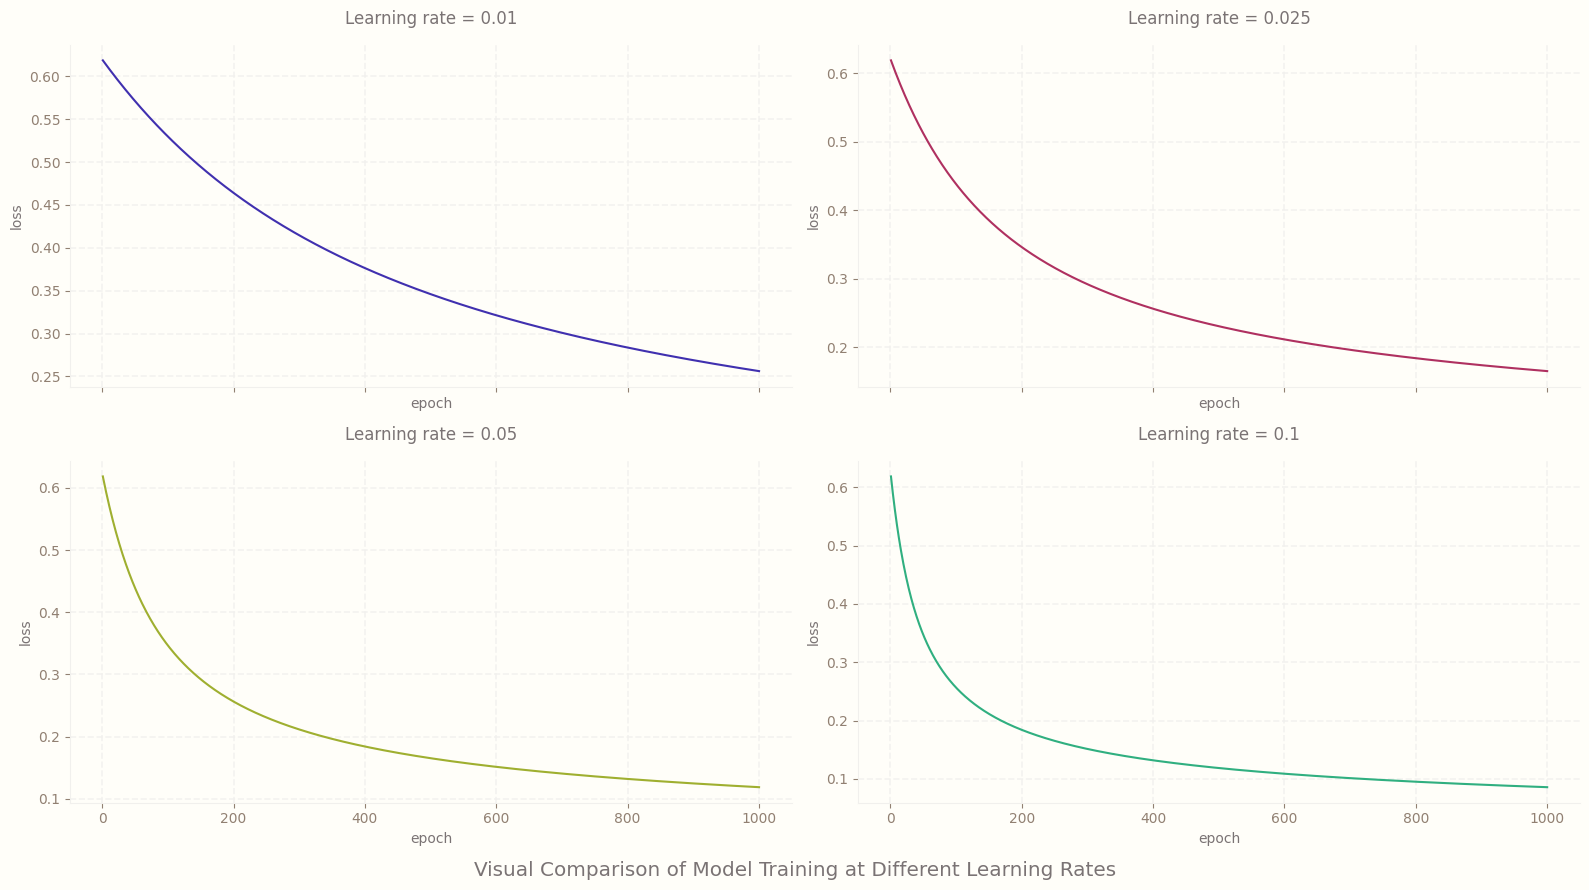

In [17]:
def loss_value_calculator(epochs,
                          criterion=nn.BCELoss(),
                          optimizer_type=torch.optim.SGD,
                          lr=0.01,
                          **kwargs):
    criterion = criterion
    optimizer = optimizer_type(model.parameters(), lr)
    epochs = epochs
    losses = []
    for i in range(epochs):
        y_pred = model.forward(X_data)
        loss = criterion(y_pred, y_data)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    [w, b] = model.parameters()
    w1, w2 = w.view(2)
    return losses, w1, w2, b


colors = calm_color_generator(4)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(2, 2, sharex=True)

torch.manual_seed(2)
model = Model(2, 1)
losses = loss_value_calculator(epochs=epochs)[0]
axs[0, 0].plot(range(1, epochs + 1), losses, c=colors.pop(0))
axs[0, 0].set_title("Learning rate = 0.01", loc="center", pad=15)

torch.manual_seed(2)
model = Model(2, 1)
losses = loss_value_calculator(epochs=epochs, lr=0.025)[0]
axs[0, 1].plot(range(1, epochs + 1), losses, c=colors.pop(0))
axs[0, 1].set_title("Learning rate = 0.025", loc="center", pad=15)

torch.manual_seed(2)
model = Model(2, 1)
losses = loss_value_calculator(epochs=epochs, lr=0.05)[0]
axs[1, 0].plot(range(1, epochs + 1), losses, c=colors.pop(0))
axs[1, 0].set_title("Learning rate = 0.05", loc="center", pad=15)

torch.manual_seed(2)
model = Model(2, 1)
losses = loss_value_calculator(epochs=epochs, lr=0.1)[0]
axs[1, 1].plot(range(1, epochs + 1), losses, c=colors.pop(0))
axs[1, 1].set_title("Learning rate = 0.1", loc="center", pad=15)

for ax in axs.flat:
    ax.set(xlabel="epoch", ylabel="loss")

fig.suptitle("Visual Comparison of Model Training at Different Learning Rates",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

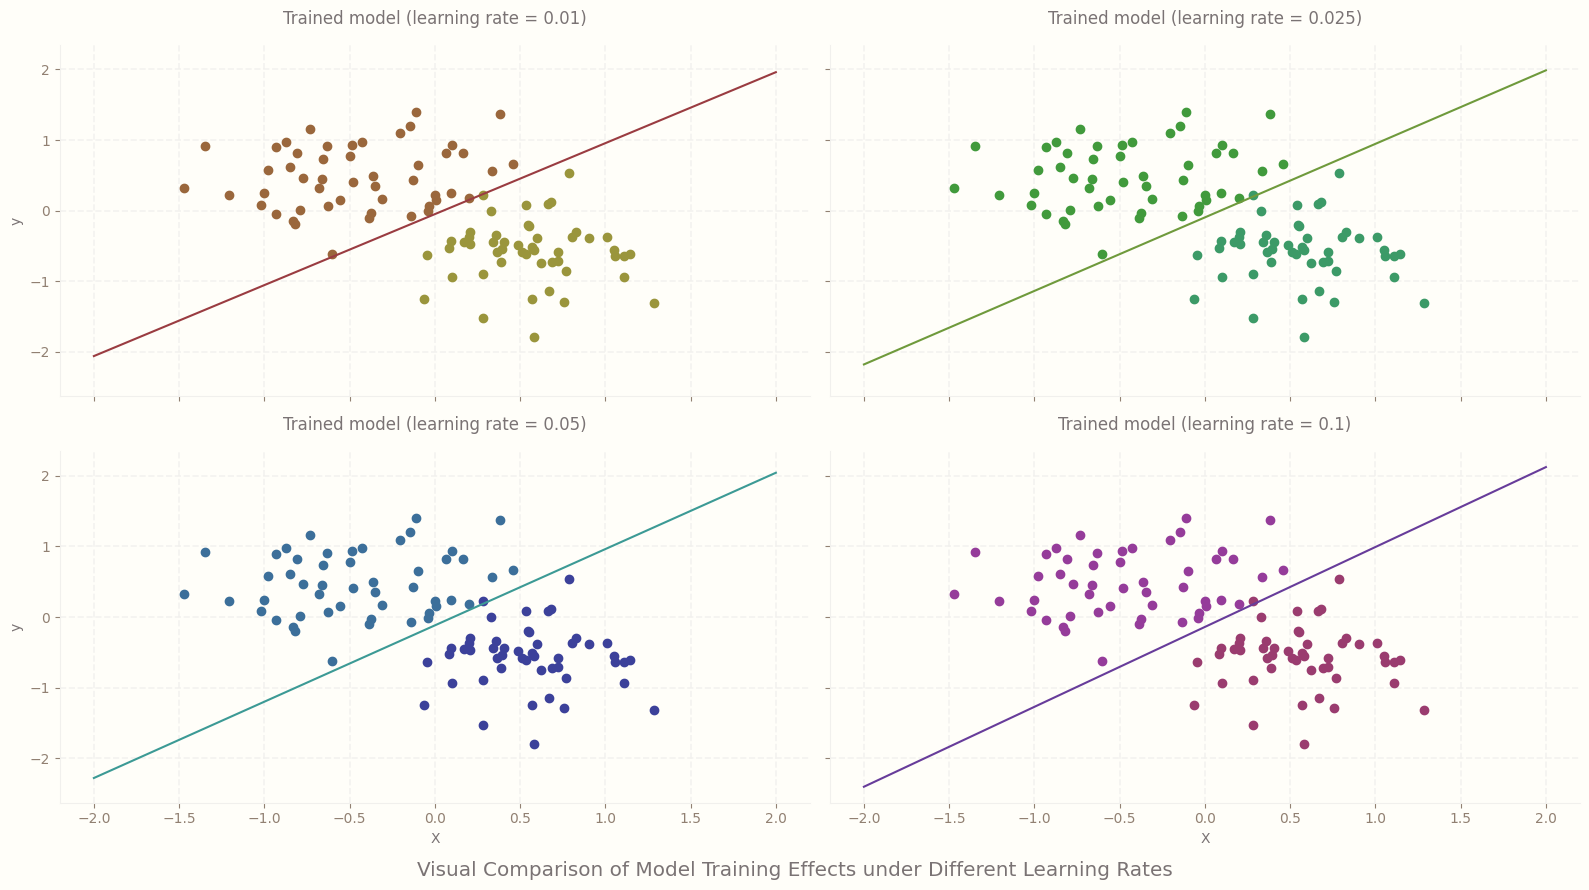

In [18]:
colors = calm_color_generator(12)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(2, 2, sharey=True)

plt.subplot(2, 2, 1)
torch.manual_seed(2)
model = Model(2, 1)
w1, w2, b = loss_value_calculator(epochs=epochs)[1:]
plot_fit("Trained model (learning rate = 0.01)")
plt.title(axs[0, 0].get_title(), loc="center", pad=15)

plt.subplot(2, 2, 2)
torch.manual_seed(2)
model = Model(2, 1)
w1, w2, b = loss_value_calculator(epochs=epochs, lr=0.025)[1:]
plot_fit("Trained model (learning rate = 0.025)")
plt.title(axs[0, 1].get_title(), loc="center", pad=15)

plt.subplot(2, 2, 3)
torch.manual_seed(2)
model = Model(2, 1)
w1, w2, b = loss_value_calculator(epochs=epochs, lr=0.05)[1:]
plot_fit("Trained model (learning rate = 0.05)")
plt.title(axs[1, 0].get_title(), loc="center", pad=15)

plt.subplot(2, 2, 4)
torch.manual_seed(2)
model = Model(2, 1)
w1, w2, b = loss_value_calculator(epochs=epochs, lr=0.1)[1:]
plot_fit("Trained model (learning rate = 0.1)")
plt.title(axs[1, 1].get_title(), loc="center", pad=15)

for ax in axs.flat:
    ax.set(xlabel="X", ylabel="y")
    ax.label_outer()

fig.suptitle(
    "Visual Comparison of Model Training Effects under Different Learning Rates",
    fontsize="x-large",
    x=0.5,
    y=0)

plt.tight_layout()
plt.show()

## Model Testing

In [19]:
class Model(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred

    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0


tabulation = Form_Generator()
tabulation.heading_printer("Addition of prediction method for custom module")

definitions = [
    """
class Model(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred

    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0
"""
]
tabulation.definition_generator(definitions)

Addition of prediction method for custom module

    +----------------------------------------------------------+
    | Definition                                               |
    +----------------------------------------------------------+
    | class Model(nn.Module):                                  |
    |                                                          |
    |     def __init__(self, input_size, output_size):         |
    |         super().__init__()                               |
    |         self.linear = nn.Linear(input_size, output_size) |
    |                                                          |
    |     def forward(self, x):                                |
    |         pred = torch.sigmoid(self.linear(x))             |
    |         return pred                                      |
    |                                                          |
    |     def predict(self, x):                                |
    |         pred = self.forward(x)     

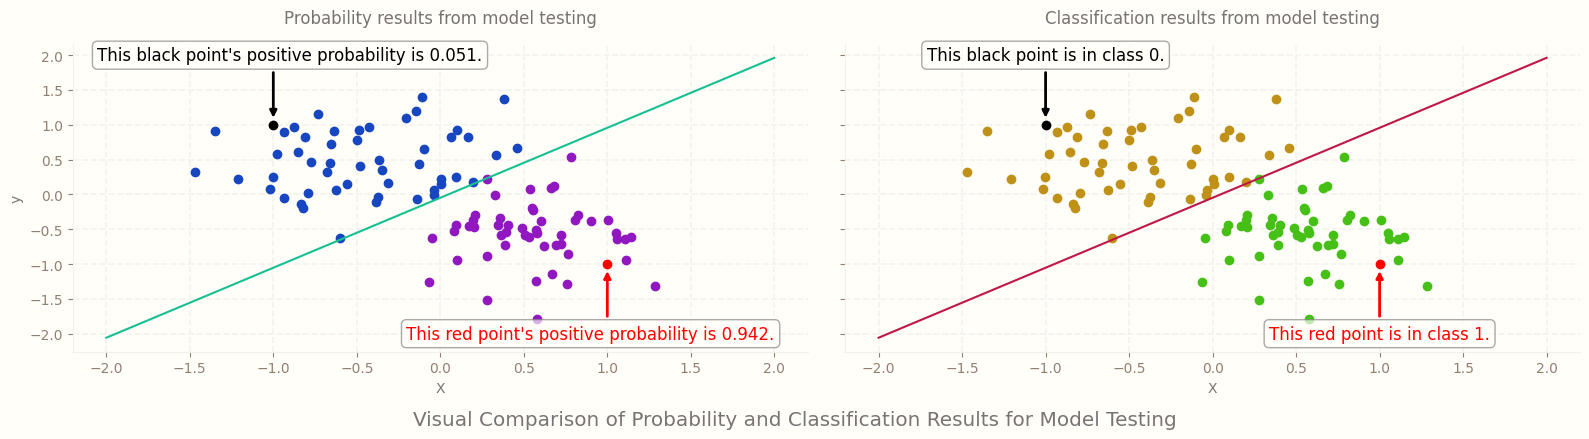

In [20]:
colors = calm_color_generator(6)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 2)

fig, axs = plt.subplots(1, 2, sharey=True)

bbox_props = dict(boxstyle="round",
                  fc=plt.rcParams["axes.facecolor"],
                  ec="0.5",
                  alpha=0.67)

point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])

plt.subplot(1, 2, 1)
torch.manual_seed(2)
model = Model(2, 1)
w1, w2, b = loss_value_calculator(epochs=epochs)[1:]
plot_fit("Probability results from model testing")
plt.plot(point1.numpy()[0], point1.numpy()[1], "ro")
plt.plot(point2.numpy()[0], point2.numpy()[1], "ko")
plt.title(axs[0].get_title(), loc="center", pad=15)

axs[0].text(.9,
            -2,
            "This red point's positive probability is {:.3f}.".format(
                model.forward(point1).item()),
            ha="center",
            va="center",
            size=12,
            rotation=0,
            color="red",
            bbox=bbox_props)
axs[0].text(-.9,
            2,
            "This black point's positive probability is {:.3f}.".format(
                model.forward(point2).item()),
            ha="center",
            va="center",
            size=12,
            rotation=0,
            color="black",
            bbox=bbox_props)
con_1 = ConnectionPatch(xyA=(1, -1.8),
                        coordsA=axs[0].transData,
                        xyB=point1.numpy(),
                        coordsB="data",
                        shrinkA=2.5,
                        shrinkB=5,
                        arrowstyle="-|>")
con_1.set_color("red")
con_1.set_linewidth(2)
con_2 = ConnectionPatch(xyA=(-1, 1.8),
                        coordsA=axs[0].transData,
                        xyB=point2.numpy(),
                        coordsB="data",
                        shrinkA=2.5,
                        shrinkB=5,
                        arrowstyle="-|>")
con_2.set_color("black")
con_2.set_linewidth(2)
axs[0].add_artist(con_1)
axs[0].add_artist(con_2)

plt.subplot(1, 2, 2)
plot_fit("Classification results from model testing")
plt.plot(point1.numpy()[0], point1.numpy()[1], "ro")
plt.plot(point2.numpy()[0], point2.numpy()[1], "ko")
plt.title(axs[1].get_title(), loc="center", pad=15)

axs[1].text(1,
            -2,
            "This red point is in class {}.".format(model.predict(point1)),
            ha="center",
            va="center",
            size=12,
            rotation=0,
            color="red",
            bbox=bbox_props)
axs[1].text(-1,
            2,
            "This black point is in class {}.".format(model.predict(point2)),
            ha="center",
            va="center",
            size=12,
            rotation=0,
            color="black",
            bbox=bbox_props)
con_1 = ConnectionPatch(xyA=(1, -1.8),
                        coordsA=axs[1].transData,
                        xyB=point1.numpy(),
                        coordsB="data",
                        shrinkA=2.5,
                        shrinkB=5,
                        arrowstyle="-|>")
con_1.set_color("red")
con_1.set_linewidth(2)
con_2 = ConnectionPatch(xyA=(-1, 1.8),
                        coordsA=axs[1].transData,
                        xyB=point2.numpy(),
                        coordsB="data",
                        shrinkA=2.5,
                        shrinkB=5,
                        arrowstyle="-|>")
con_2.set_color("black")
con_2.set_linewidth(2)
axs[1].add_artist(con_1)
axs[1].add_artist(con_2)

for ax in axs.flat:
    ax.set(xlabel="X", ylabel="y")
    ax.label_outer()

fig.suptitle(
    "Visual Comparison of Probability and Classification Results for Model Testing",
    fontsize="x-large",
    x=0.5,
    y=0)

plt.tight_layout()
plt.show()